In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

# Set plot style
sns.set(style="whitegrid")

# Step 2: Load Netflix dataset
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Vois\Netflix Dataset.csv")  # change to your dataset filename if different

# View first few rows
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Dataset overview
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn names:\n", df.columns)

# Info & missing values
df.info()

# Check null values
df.isnull().sum()


Rows: 7789
Columns: 11

Column names:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [4]:
# 🧹 Step 3: Data Cleaning (robust version)

# Convert all column names to lowercase for consistency
df.columns = df.columns.str.lower().str.strip()

# Check what columns exist
print("Columns:", df.columns.tolist())

# Fill missing values safely
if 'country' in df.columns:
    df['country'] = df['country'].fillna("Unknown")

if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['date_added'] = df['date_added'].fillna(method='ffill')
    df['year_added'] = df['date_added'].dt.year
else:
    print("⚠️ 'date_added' column not found — skipping this step.")

if 'rating' in df.columns:
    df['rating'] = df['rating'].fillna("Not Rated")

# Drop duplicates
df = df.drop_duplicates()

# Quick check
df.head()


Columns: ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']
⚠️ 'date_added' column not found — skipping this step.


,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


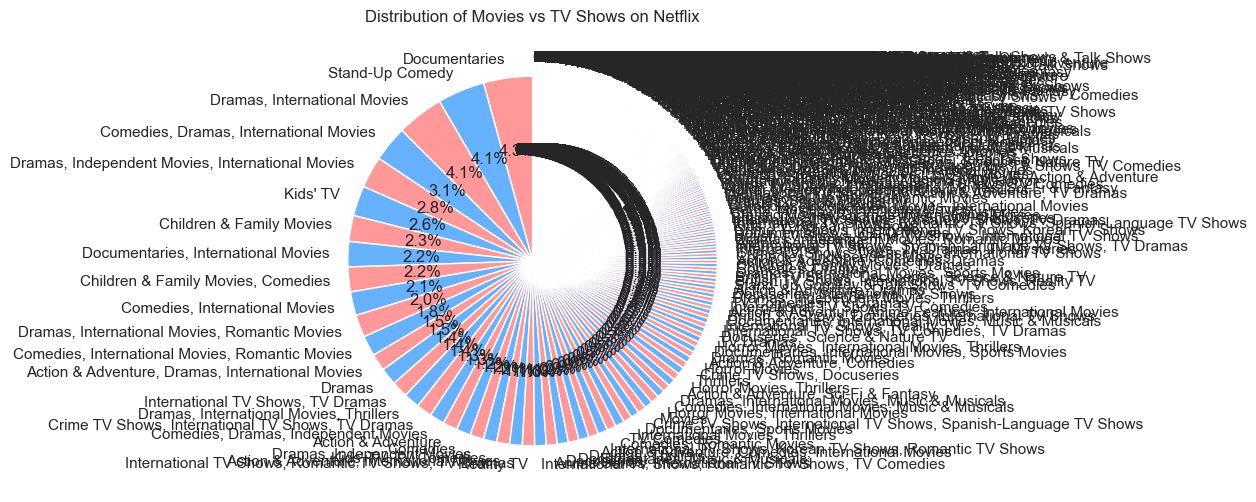

In [5]:
# Count of Movies vs TV Shows
type_count = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B2FF'])
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.show()


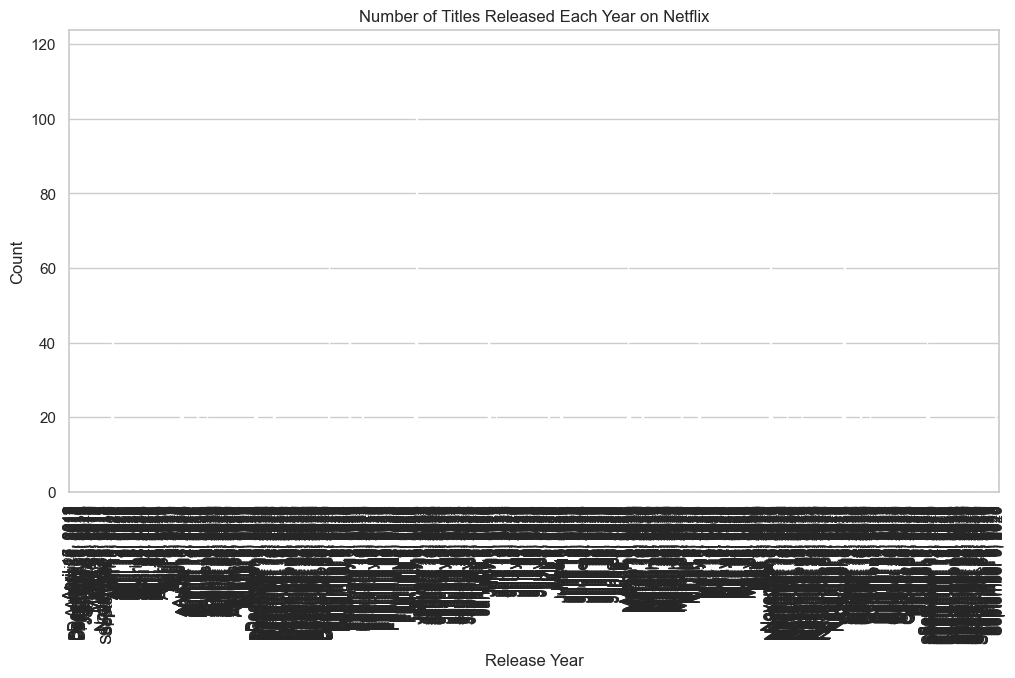

In [6]:
# Drop missing years
df = df.dropna(subset=['release_date'])

# Count titles added by year
plt.figure(figsize=(12,6))
sns.countplot(x='release_date',hue='release_date', data=df, palette='rocket', order=sorted(df['release_date'].unique()))
plt.xticks(rotation=90)
plt.title("Number of Titles Released Each Year on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


✅ Using 'category' column for genre analysis


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8480\3182349030.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


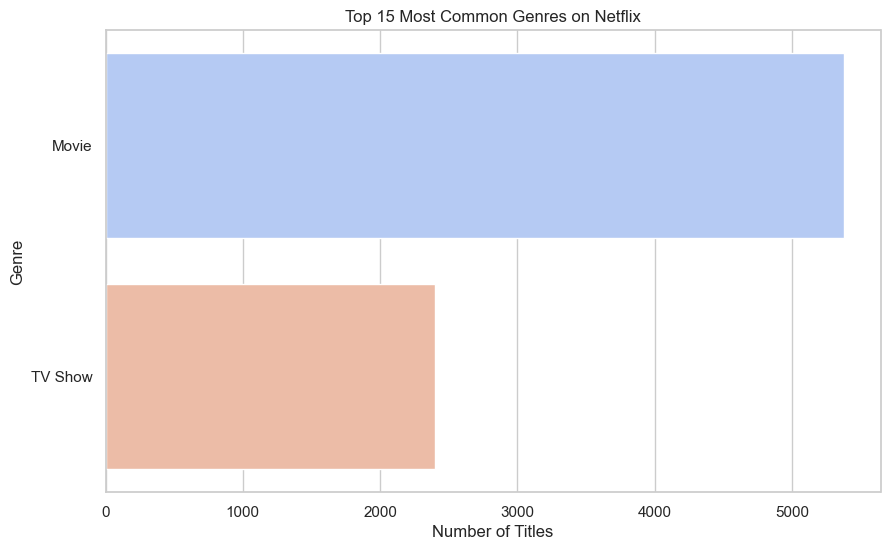

In [7]:
# 🎭 Step: Most Popular Genres (robust to column name differences)

# Normalize columns
df.columns = df.columns.str.lower().str.strip()

# Try to find a column related to genre/listing
genre_col = None
for possible in ['listed_in', 'genre', 'genres', 'category', 'type_of_content']:
    if possible in df.columns:
        genre_col = possible
        break

if genre_col:
    print(f"✅ Using '{genre_col}' column for genre analysis")
    genres = df[genre_col].dropna().astype(str).str.split(',').explode().str.strip()
    top_genres = genres.value_counts().head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
    plt.title("Top 15 Most Common Genres on Netflix")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.show()
else:
    print("⚠️ No genre-related column found in dataset — skipping this step.")



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8480\2701425249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


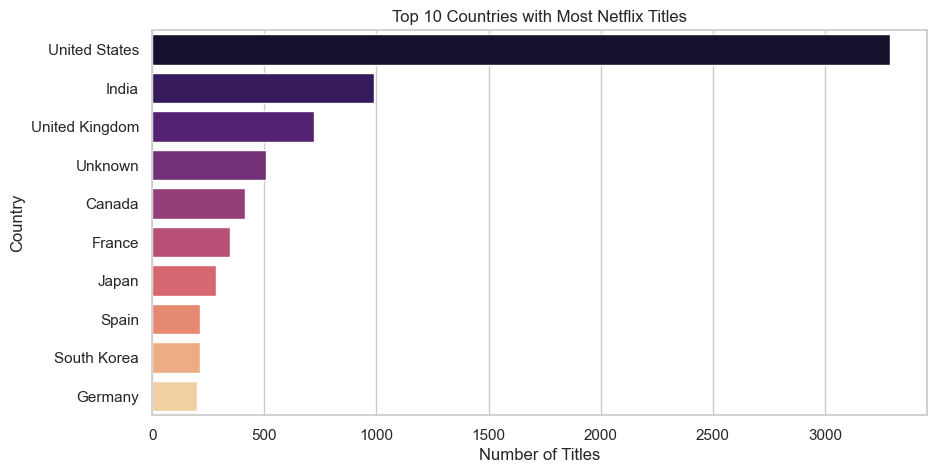

In [8]:
# Extract and count countries
countries = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8480\1711660384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')


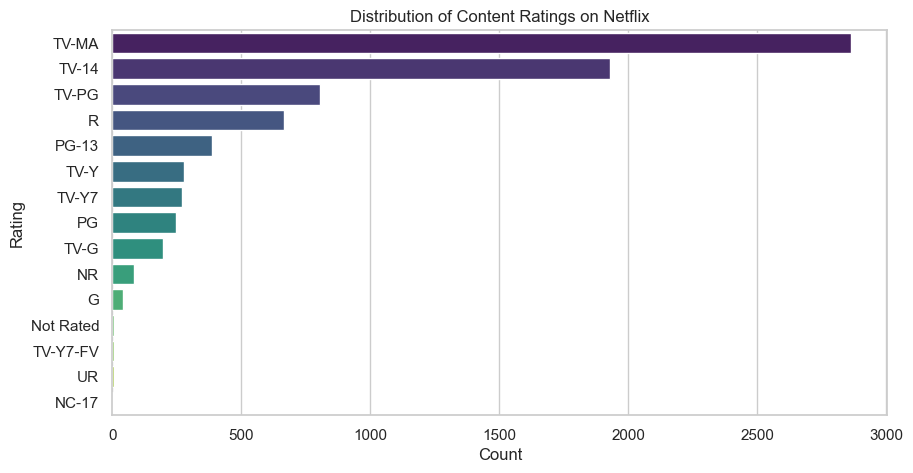

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


In [10]:
print("✅ Key Insights:")
print("- Netflix has more Movies than TV Shows.")
print("- There is a steady growth in titles, with a sharp rise after 2015.")
print("- The most popular genres are International Movies, Dramas, and Comedies.")
print("- The USA, India, and UK are top contributors to Netflix content.")
print("- Netflix can explore expanding localized content in emerging markets like Korea and Spain.")


✅ Key Insights:
- Netflix has more Movies than TV Shows.
- There is a steady growth in titles, with a sharp rise after 2015.
- The most popular genres are International Movies, Dramas, and Comedies.
- The USA, India, and UK are top contributors to Netflix content.
- Netflix can explore expanding localized content in emerging markets like Korea and Spain.
